## ADF Unit Root Test

This exercise will introduce you to the concept of non-stationarity and the ADF unit root test

In [1]:
import Haver
import numpy as np
import pandas as pd
from pandas import Series
from pandas import DataFrame
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox as lb
from statsmodels.tsa.stattools import adfuller

In [2]:
Haver.path()

'R:\\\\'

In [3]:
Haver.path('C:\\Users\\RNAMG01\\Desktop\\python haver training\\US1PLUS\\')

In [4]:
Haver.path()

'C:\\Users\\RNAMG01\\Desktop\\python haver training\\US1PLUS'

In [5]:
## Import some data from the Haver us1plus database
## It is important to set the "dates" arguemtn to true for pandas
## It will bring the data in with the correct data structure.

rgdp=Haver.data(['gdph'], 'us1plus', dates=True)

In [6]:
## We can check the data and data type

rgdp.head()

,gdph
1947-03-31,2033.1
1947-06-30,2027.6
1947-09-30,2023.5
1947-12-31,2055.1
1948-03-31,2086.0


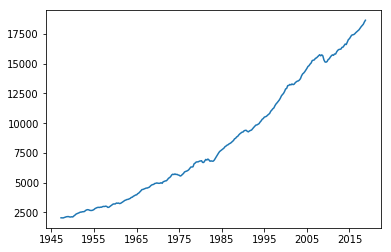

In [7]:
## It is always a good first step to look at your data. This can help
## catch any data errors, but also help you understand the data and any
## trends or cycles that may be present.

plt.plot(rgdp)

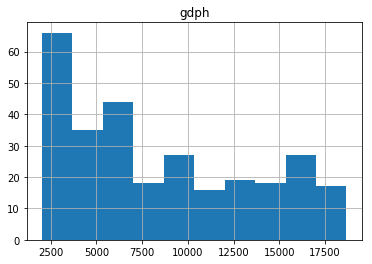

In [8]:
rgdp.hist()
plt.show()


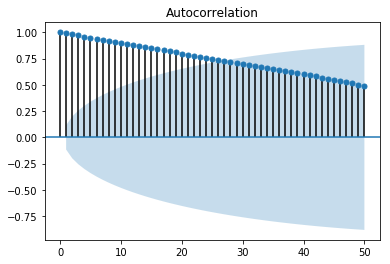

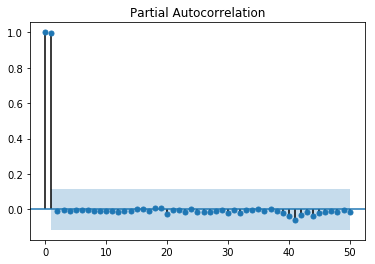

In [9]:
## Plot the correlogram up to 50 lags to look at the autocorrelations

x=plot_acf(rgdp, lags=50)
y=plot_pacf(rgdp, lags=50)

In [10]:
## The Ljung-Box test will check for serial correlation up to lag x. Null: No serial correlation Alt: Serial correlation

lb_test=lb(rgdp, lags=25, boxpierce=False)


In [11]:
result = adfuller(rgdp.iloc[:,0].values, autolag="AIC")


print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: 2.971201
p-value: 1.000000
Critical Values:
	1%: -3.454
	5%: -2.872
	10%: -2.572


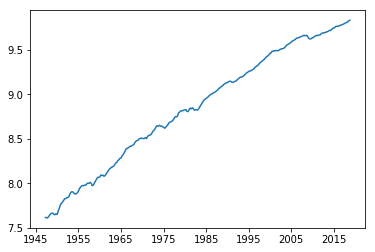

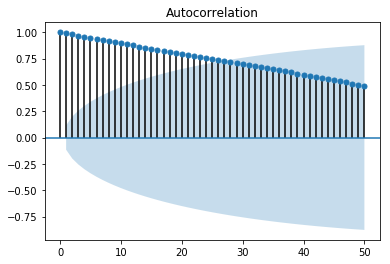

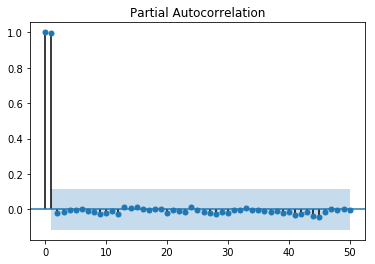

In [12]:
## Take the natural log of the data. Why might we want to do this?

lrgdp=np.log(rgdp)

plt.plot(lrgdp)

x=plot_acf(lrgdp, lags=50)
y=plot_pacf(lrgdp, lags=50)

In [13]:
result = adfuller(lrgdp.iloc[:,0].values,autolag="AIC")

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.117382
p-value: 0.237583
Critical Values:
	1%: -3.454
	5%: -2.872
	10%: -2.572


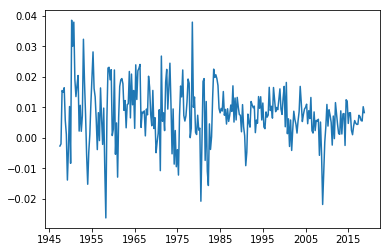

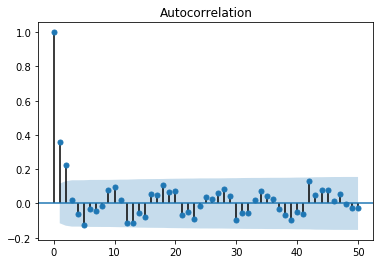

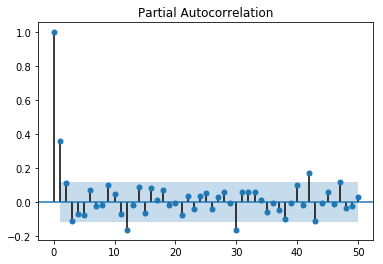

In [14]:
## Take the difference of the logs and look at the ACF.

dlrgdp=lrgdp-lrgdp.shift()

plt.plot(dlrgdp)

x=plot_acf(dlrgdp [1:], lags=50)
y=plot_pacf(dlrgdp [1:], lags=50)

In [15]:
dlrgdp=dlrgdp[1:]

result = adfuller(dlrgdp.iloc[:,0].values,autolag="AIC")

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -8.400678
p-value: 0.000000
Critical Values:
	1%: -3.454
	5%: -2.872
	10%: -2.572
